In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [58]:
# Loading demographics data
df = pd.read_csv('Demographics_by_Borough.csv')

In [59]:
print(df.shape)

(155, 47)


In [60]:
# Checking for missing values
print(df.isnull().sum())

Data os of Date                                           0
BoroughName                                               0
ProgramTypeName                                           0
Female Count                                              0
Female Percentage                                         0
Male Count                                                0
Male Percentage                                           0
Gender Nonconforming Count                                0
Gender Nonconforming Percentage                           0
American Indian or Alaskan Native Count                   0
American Indian or Alaskan Native Percentage              0
Asian Count                                               0
Asian Percentage                                          0
Black or African American Count                           0
Black or African American Percentage                      0
Multi-race Count                                          0
Multi-race Percentage                   

In [61]:
# Droping rows with missing values
df= df.dropna()

In [62]:
# Checking for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [63]:
# Droping duplicate rows if present
df= df.drop_duplicates()

In [64]:
# Removing outliers in data Using Z_scores method

# Specify the columns for which you want to remove outliers
columns_to_remove_outliers = ['Female Count', 'Male Count', 'Gender Nonconforming Count']

# Defining function to remove outliers
def remove_outliers(df, columns):
    for column in columns:
        # Calculate z-scores for the column
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        
        # Define a threshold for outliers (adjust as needed)
        threshold = 3
        
        # Identify and remove outliers
        outliers = abs(z_scores) > threshold
        df = df[~outliers]
    
    return df

# Applying the function to remove outliers from specified columns
df = remove_outliers(df, columns_to_remove_outliers)


In [65]:
print(df.shape)

(72, 47)


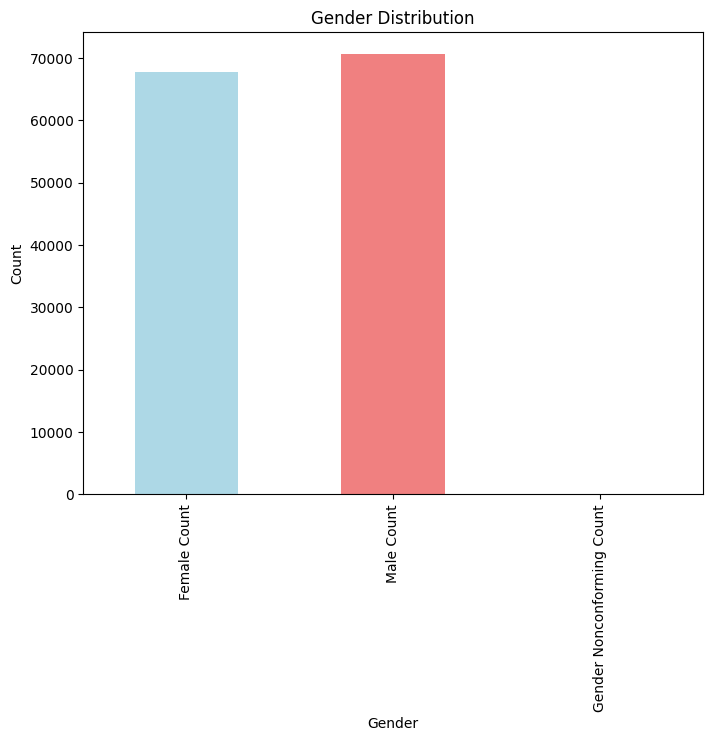

In [66]:
# For understanding gender distribution 

gender_counts = df[['Female Count', 'Male Count', 'Gender Nonconforming Count',]].sum()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral', 'lightgrey'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

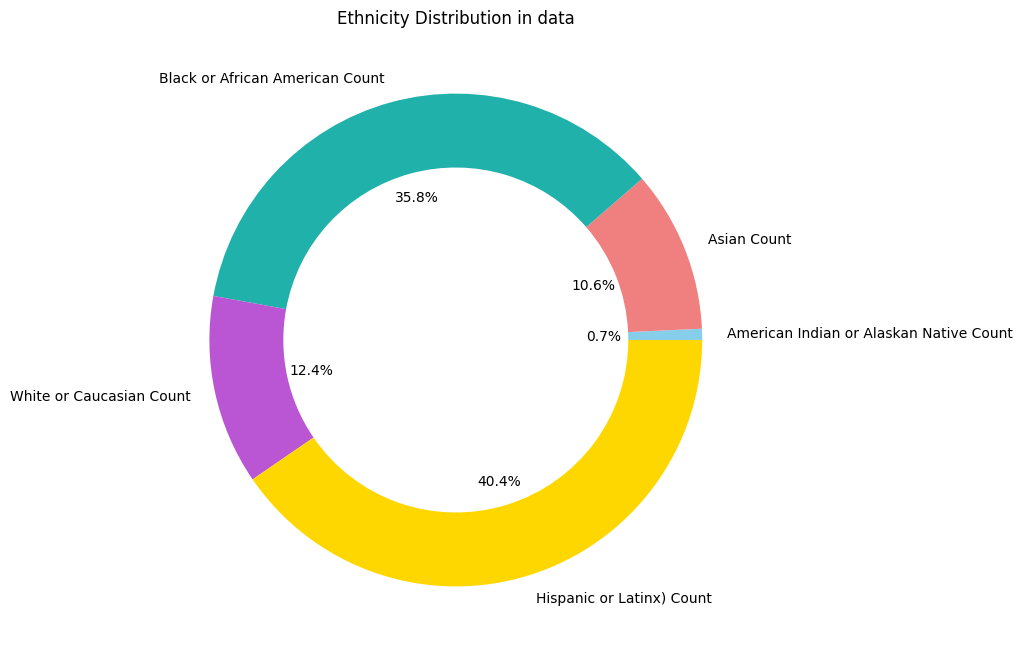

In [67]:
# Visualization 1 - Donut chart
ethnicity_counts = df[['American Indian or Alaskan Native Count','Asian Count', 
                   'Black or African American Count','White or Caucasian Count', 'Hispanic or Latinx) Count']].sum()

colors = ['skyblue', 'lightcoral', 'lightseagreen', 'mediumorchid', 'gold']

plt.figure(figsize=(8, 8))
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.3))
plt.title('Ethnicity Distribution in Newyork')
plt.show()


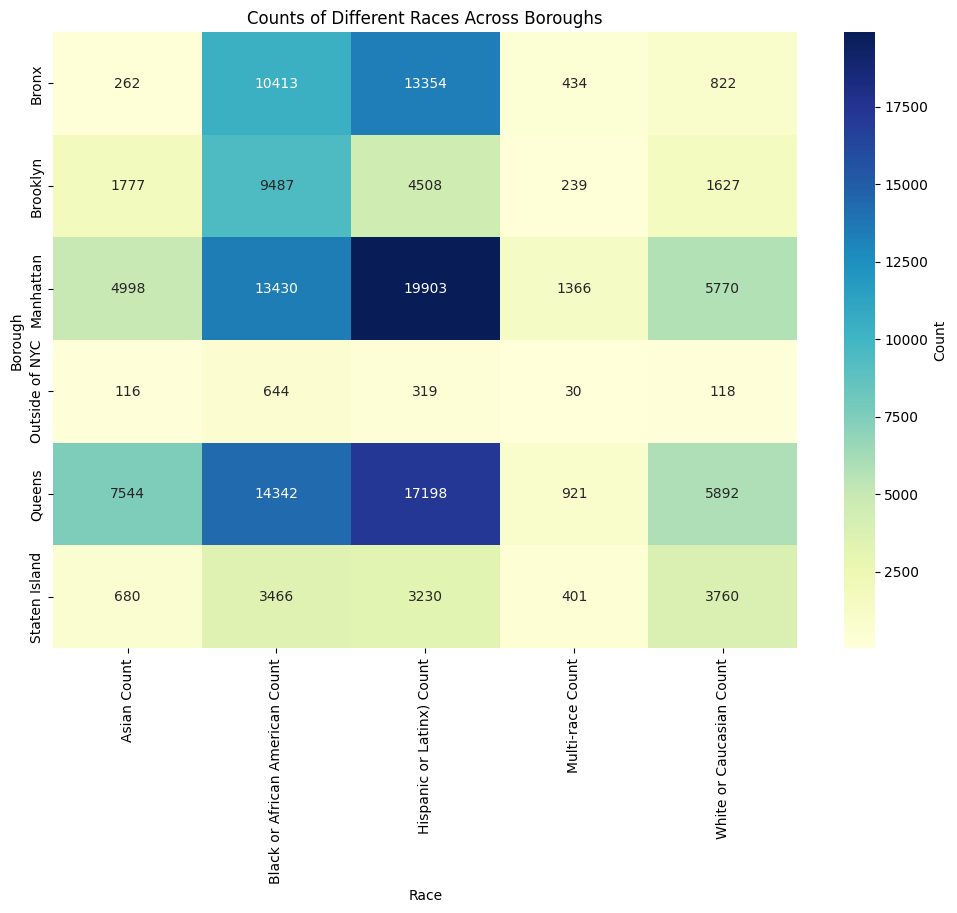

In [68]:

# Visualization 2 :Heat map

# Selecting the relevant columns
race_columns = ['Hispanic or Latinx) Count', 'Asian Count',
                'Black or African American Count', 'White or Caucasian Count', 'Multi-race Count']

# Pivot the data to create a heatmap
heatmap_data = df.pivot_table(index='BoroughName', values=race_columns, aggfunc='sum')

# plot 
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Count'})
plt.title('Counts of Different Races Across Boroughs')
plt.xlabel('Race')
plt.ylabel('Borough')
plt.show()


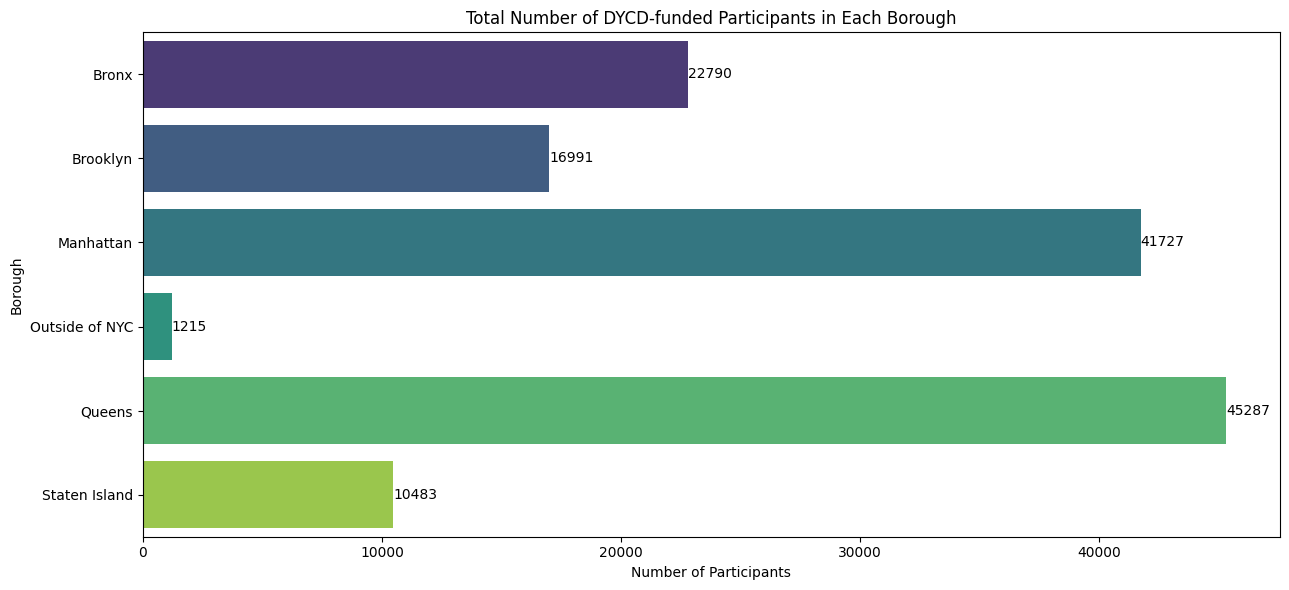

In [69]:
# Visualization 3 : horizontal bar plot

# Number of DYCD-funded Male Participants in Each Borough

df['Total Count'] = df['Male Count']+df['Female Count']+df['Gender Nonconforming Count']


borough_participants = df.groupby('BoroughName')['Total Count'].sum().reset_index()

plt.figure(figsize=(13, 6))
plot = sns.barplot(x='Total Count', y='BoroughName', data=borough_participants, palette='viridis')

# Displaying numbers on bars
for index, value in enumerate(borough_participants['Total Count']):
    plot.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

plt.title('Total Number of DYCD-funded Participants in Each Borough')
plt.xlabel('Number of Participants')
plt.ylabel('Borough')
plt.tight_layout()
plt.show()

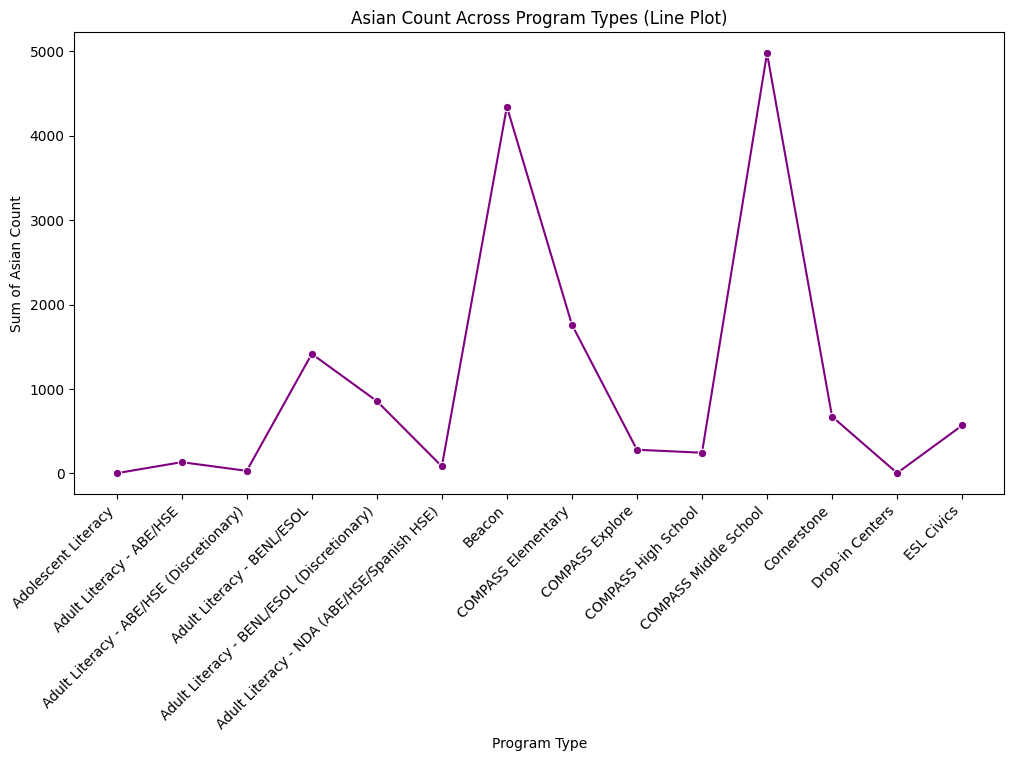

In [70]:
# Visualization 4 :  Line chart
# Group by ProgramTypeName and sum the asian 
grouped_df = df.groupby('ProgramTypeName')['Asian Count'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='ProgramTypeName', y='Asian Count', data=grouped_df, marker='o', color='Purple')
plt.title('Asian Count Across Program Types (Line Plot)')
plt.xlabel('Program Type')
plt.ylabel('Sum of Asian Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [72]:
health_df= pd.read_csv('NYC_Health___Hospitals_patient_care_locations_-_2011.csv')

In [73]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Facility Type     78 non-null     object 
 1   Borough           78 non-null     object 
 2   Facility Name     78 non-null     object 
 3   Cross Streets     27 non-null     object 
 4   Phone             78 non-null     object 
 5   Location 1        78 non-null     object 
 6   Postcode          60 non-null     float64
 7   Latitude          60 non-null     float64
 8   Longitude         60 non-null     float64
 9   Community Board   60 non-null     float64
 10  Council District  60 non-null     float64
 11  Census Tract      60 non-null     float64
 12  BIN               60 non-null     float64
 13  BBL               60 non-null     float64
 14  NTA               60 non-null     object 
dtypes: float64(8), object(7)
memory usage: 9.3+ KB


In [74]:
health_df.shape

(78, 15)

In [75]:
print(health_df.isnull().sum())

Facility Type        0
Borough              0
Facility Name        0
Cross Streets       51
Phone                0
Location 1           0
Postcode            18
Latitude            18
Longitude           18
Community Board     18
Council District    18
Census Tract        18
BIN                 18
BBL                 18
NTA                 18
dtype: int64


In [76]:
health_df= health_df.dropna(subset=['Latitude','Longitude'])

In [77]:
health_df.shape

(60, 15)

In [78]:
# Check for duplicate rows
print("Number of duplicate rows:", health_df.duplicated().sum())

# Drop duplicate rows
health_df= health_df.drop_duplicates()

Number of duplicate rows: 0


In [79]:
import pandas as pd
from scipy import stats

numerical_columns = health_df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    
    z_scores = stats.zscore(health_df[column])
    
    outliers = (abs(z_scores) > 3)
    
    health_df = health_df[~outliers]

In [80]:
health_df.shape

(57, 15)

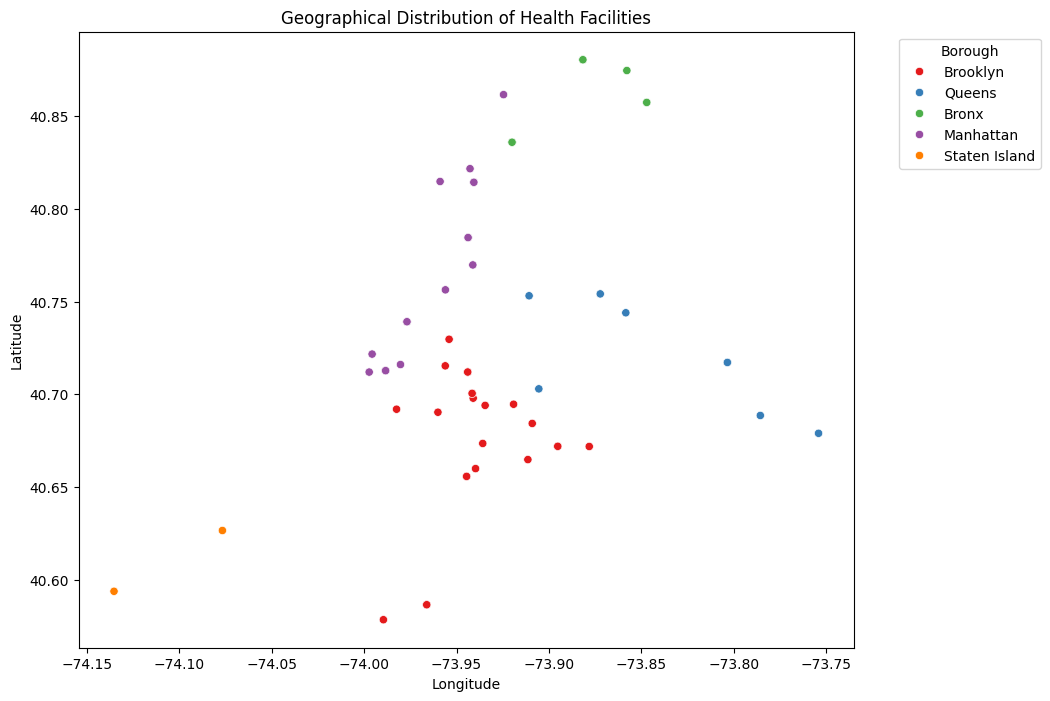

In [81]:
# Visualization 1
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=health_df, hue='Borough', palette='Set1')
plt.title('Geographical Distribution of Health Facilities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [82]:
# Map visualization
import folium

# Create a base map centered around the mean latitude and longitude
map_viz = folium.Map(location=[health_df['Latitude'].mean(), health_df['Longitude'].mean()], zoom_start=12)

# Add markers for each health facility
for i, row in health_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Facility Name']}\n{row['Facility Type']}",
        icon=folium.Icon(color='red', icon='ambulance', prefix='fa')
    ).add_to(map_viz)

# Save the map as an HTML file
map_viz.save('health_facilities_map.html')

# Display the map
map_viz

In [83]:
arrest_df=pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')

In [84]:
arrest_df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,...,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426),16.0,2.0,49.0,49.0,17618.0
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,...,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923),55.0,2.0,25.0,46.0,17614.0
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,...,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468),1.0,2.0,44.0,37.0,17616.0
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,...,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797),18.0,4.0,36.0,20.0,12427.0
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,...,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175),16.0,2.0,48.0,49.0,17615.0


In [85]:
arrest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170095 entries, 0 to 170094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                170095 non-null  int64  
 1   ARREST_DATE               170095 non-null  object 
 2   PD_CD                     170095 non-null  int64  
 3   PD_DESC                   170095 non-null  object 
 4   KY_CD                     170082 non-null  float64
 5   OFNS_DESC                 170095 non-null  object 
 6   LAW_CODE                  170095 non-null  object 
 7   LAW_CAT_CD                168838 non-null  object 
 8   ARREST_BORO               170095 non-null  object 
 9   ARREST_PRECINCT           170095 non-null  int64  
 10  JURISDICTION_CODE         170095 non-null  int64  
 11  AGE_GROUP                 170095 non-null  object 
 12  PERP_SEX                  170095 non-null  object 
 13  PERP_RACE                 170095 non-null  o

In [86]:
arrest_df['ARREST_DATE'] = pd.to_datetime(arrest_df['ARREST_DATE'], errors='coerce')

In [87]:
#Checking for missing values
print(arrest_df.isnull().sum())

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          0
PD_DESC                        0
KY_CD                         13
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1257
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
Community Districts           15
Borough Boundaries            19
City Council Districts        15
Police Precincts              15
Zip Codes                    375
dtype: int64


In [88]:
arrest_df = arrest_df.dropna()

In [89]:
arrest_df = arrest_df.drop_duplicates()

In [90]:
arrest_df.shape

(168432, 24)

In [91]:
import pandas as pd
from scipy import stats

# Selecting only numerical columns
numerical_columns = arrest_df.select_dtypes(include=['float64', 'int64']).columns

# Loop through numerical columns
for column in numerical_columns:
    
    # Calculating Z-scores for each data point in the column
    z_scores = stats.zscore(arrest_df[column])
    
    # Identify outliers by setting threshold to 3
    outliers = (abs(z_scores) > 3)
    
    # Remove rows containing outliers
    arrest_df = arrest_df[~outliers]

# Optionally, reset the index after removing outliers
df = df.reset_index(drop=True)


In [92]:
arrest_df.shape

(161595, 24)

<Figure size 1200x600 with 0 Axes>

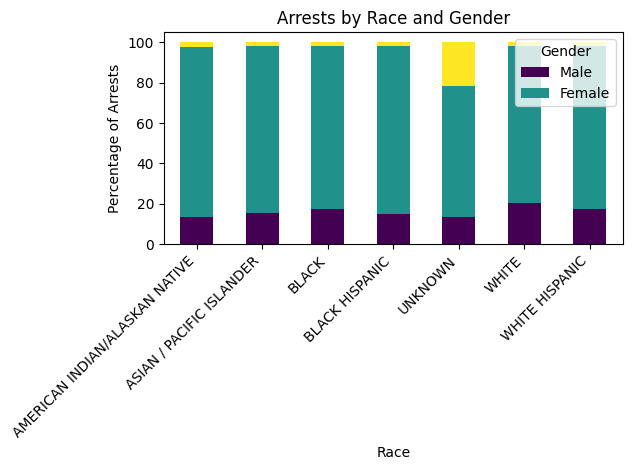

In [93]:
# Count the number of arrests for each race and gender
arrests_by_race_gender = arrest_df.groupby(['PERP_RACE', 'PERP_SEX']).size().unstack().fillna(0)

# Calculate percentage for each gender within each race
arrests_by_race_gender_percentage = arrests_by_race_gender.div(arrests_by_race_gender.sum(axis=1), axis=0) * 100

# Plot the results
plt.figure(figsize=(12, 6))
ax = arrests_by_race_gender_percentage.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Arrests by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Percentage of Arrests')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

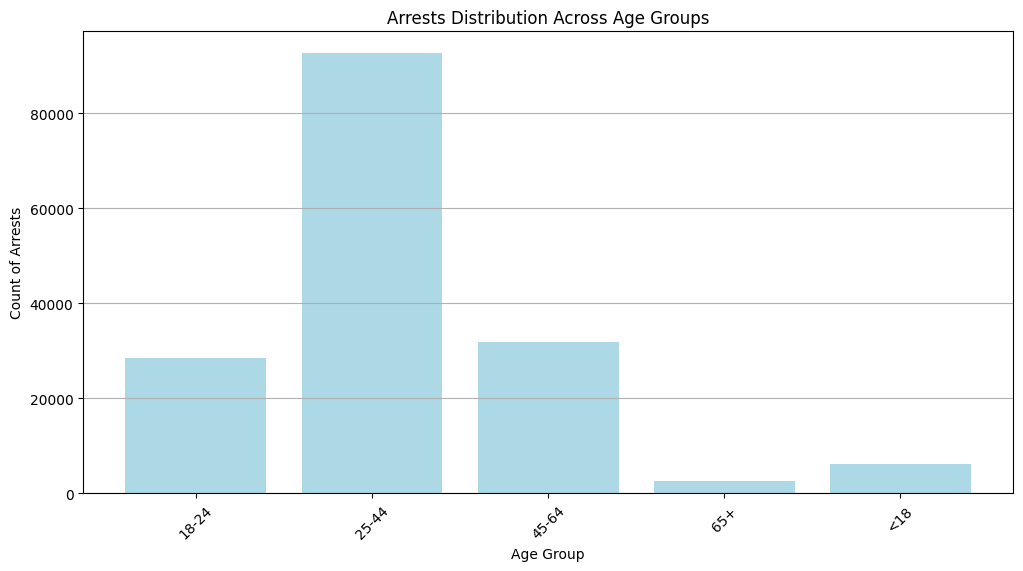

In [94]:
arrests_by_age = arrest_df['AGE_GROUP'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(arrests_by_age.index, arrests_by_age, color='lightblue')
plt.title('Arrests Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count of Arrests')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

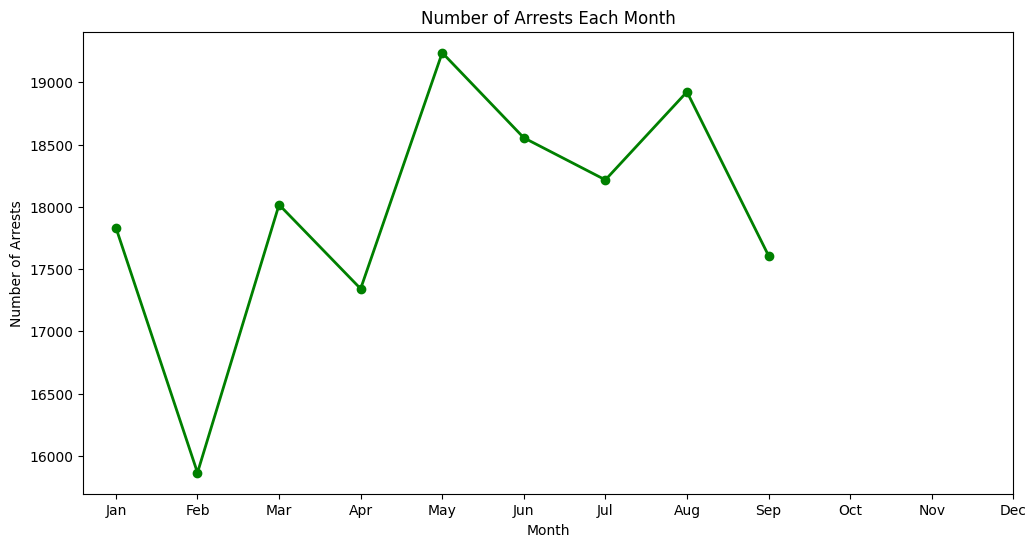

In [95]:
arrest_df['Month'] = arrest_df['ARREST_DATE'].dt.month

# Count the number of arrests for each month
arrests_by_month = arrest_df['Month'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(arrests_by_month.index, arrests_by_month, marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Number of Arrests Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()